# PRÁCTICA FINAL MODELOS SUPERVISADOS
### Patricia Mañueco Cubillo y Adriana Castro Santodomingo


En este notebook se planea realizar un análisis exploratorio del dataset NCDB_1999_to_2014, que refleja los accidentes de tráfico que tienen lugar en Canadá. Con este análisis se facilitará la interpretación de los datos y la elaboración de modelos que ayudarán con la estimación y prevención de futuros posibles accidentes.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

Empezaremos importando las librerías que vamos a necesitar, junto a la base de datos con la que vamos a trabajar. Hacemos una vista previa de las primeras tres filas para comprobar que los datos se han importado correctamente.

In [4]:
pd_datos = pd.read_csv('~/Documents/BU/Master/2/NCDB_1999_to_2014.csv')
pd_datos.columns = pd_datos.columns.str.replace (' ','_')
pd_datos.head (3)

/Users/adri/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2


Podemos observar como las tres primeras filas se repiten la fecha y la hora, significando que ese fue un mismo accidente. Analizando los datos, podemos tener una mejor idea de lo que sucedio y quienes fueron los implicados. 

In [8]:
# datos fechas accidente
columnas_accidente = ['C_YEAR', 'C_MNTH', 'C_WDAY', 
               'C_HOUR', 'C_SEV', 'C_VEHS', 
               'C_CONF', 'C_RCFG', 'C_WTHR', 
               'C_RSUR', 'C_RALN', 'C_TRAF']
pd_datos[columnas_accidente].head(3)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF
0,1999,1,1,20,2,02,34,UU,1,5,3,03
1,1999,1,1,20,2,02,34,UU,1,5,3,03
2,1999,1,1,20,2,02,34,UU,1,5,3,03


Como ejemplo, podemos ver en la tabla superior el primer accidente del año 1999, con los datos siendo los siguientes: 
- **C_YEAR**: sucedió en 1999
- **C_MNTH**: sucedió en Enero
- **C_WDAY**: sucedió el dia 1 del mes
- **C_HOUR**: tuvo lugar entre las 20:00 y las 20:59 horas
- **C_SEV**: la colisión provocó lesiones no fatales
- **C_VEHS**: hubo 2 vehículos implicados
- **C_CONF**: se trata de dos vehículos en movimiento con diferente dirección de viaje: un giro a la derecha, incluidos los conflictos de giro
- **C_RCFG**: no se sabe la configuración de la calzada
- **C_WTHR**: el tiempo estaba despejado y soleado
- **C_RSUR**: la superficie de la carretera estaba helada
- **C_RALN**: la alineación de la carretera era curva y nivelada
- **C_TRAF**: el control de tráfico consistía en una señal de stop

In [9]:
tipo_coche = pd_datos[['V_ID', 'V_TYPE', 'V_YEAR']]
tipo_coche.head (3)

,V_ID,V_TYPE,V_YEAR
0,01,06,1990
1,02,01,1987
2,02,01,1987


Como podemos ver en la tabla de arriba, hubo tres personas implicadas en el accidente, y dos vehículos. En el primero iba una persona, el conductor, y se trata de un tipo de camión (**V_TYPE 06**) que fue fabricado el 1990. En el segundo iban dos personas, y se trata de un vehículo ligero (**V_TYPE 01**) fabricado el 1987.

In [10]:
tipo_pers = pd_datos[['P_ID', 'P_SEX', 'P_AGE', 
               'P_PSN', 'P_ISEV', 'P_SAFE',
               'P_USER']]
tipo_pers.head (3)

,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,01,M,41,11,1,UU,1
1,01,M,19,11,1,UU,1
2,02,F,20,13,2,02,2


En esta tabla tenemos más información acerca de las personas que iban en cada vehículo.
- En el primer vehículo, un tipo de camión fabricado en 1990, viajaba solo una persona (**P_ID 01**) que tenía 41 años (**P_AGE 41**), hombre (**P_SEX M**) y era el conductor del vehículo (**P_USER 1**) y que estaba en la posición del conductor (**P_PSN 11**). No sufrío ningun tipo de daño en el accidente (**P_ISEV 1**) y se desconoce si llevaba o utilizaba algún dispositivo de seguridad (**P_SAFE = UU**).
- En el segundo vehículo, un vehículo ligero fabricado en 1987, viajaban dos personas. Un hombre (**P_SEX M**) de 19 años (**P_AGE 19**), que conducía el vehículo (**P_USER 1**) en la posición del conductor (**P_PSN 11**), y que salió sin daño del accidente (**P_ISEV 1**). La otra persona era una mujer (**P_SEX F**) de 20 años (**P_AGE 20**) que iba de pasajera en el asiento delantero derecho (**P_PSN = 13**). Salió herida (**P_ISEV 2**) del accidente, y sí utilizo un dispositivo de seguridad (**P_SAFE 02**).

In [11]:
# Tipos de datos
pd_datos.dtypes.to_dict()
# dtype ('o') stands for object, string or text
# float64; Python is storing each value within this column as a 64 bit integer

{'C_YEAR': dtype('int64'),
 'C_MNTH': dtype('O'),
 'C_WDAY': dtype('O'),
 'C_HOUR': dtype('O'),
 'C_SEV': dtype('int64'),
 'C_VEHS': dtype('O'),
 'C_CONF': dtype('O'),
 'C_RCFG': dtype('O'),
 'C_WTHR': dtype('O'),
 'C_RSUR': dtype('O'),
 'C_RALN': dtype('O'),
 'C_TRAF': dtype('O'),
 'V_ID': dtype('O'),
 'V_TYPE': dtype('O'),
 'V_YEAR': dtype('O'),
 'P_ID': dtype('O'),
 'P_SEX': dtype('O'),
 'P_AGE': dtype('O'),
 'P_PSN': dtype('O'),
 'P_ISEV': dtype('O'),
 'P_SAFE': dtype('O'),
 'P_USER': dtype('O')}

In [12]:
# Dimensión dataset
print(pd_datos.shape)

(5860405, 22)


Para un primer análisis de nuestro dataset utilizaremos **P_PSN 11**, es decir los conductores de los vehículos implicados para estudiar el número de accidentes sucedidos desde 1999 a 2014. No nos fijaremos en que se repitan filas a consecuencia del número de individuos implicados hasta más adelante que eliminaremos las tuplas repetidas, dándonos realmente el número de accidentes real.

In [13]:
pd_accidentes = pd_datos[(pd_datos['P_PSN']=="11")]
pd_accidentes.shape

(3926086, 22)

# Preguntas 1 y 2

1. ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?

2. ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son menos propensos a tener accidentes (descuento en prima)?

In [14]:
#tabla de contingenia relativa total centrándonos en vehiculo(años)
conting_table = pd.crosstab(index=pd_accidentes['V_TYPE'], columns=pd_accidentes['V_YEAR'],
            margins=True).apply(lambda r: r/len(pd_accidentes) *100,
                                axis=1)

Para la siguiente tabla no hemos empleado los datos sin las filas repetidas ya que tan solo vamos a tener en cuenta el valor máximo y mínimo de cada variable, por lo que los valores repetidos son indiferentes

In [15]:
conting_table.describe()

V_YEAR,1901,1903,1904,1905,1906,1907,1908,1909,1910,1911,...,2009,2010,2011,2012,2013,2014,2015,NNNN,UUUU,All
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.000022,0.000010,0.000005,0.000002,0.000002,0.000005,0.000007,0.000005,0.000002,0.000017,...,0.177419,0.153758,0.107879,0.085594,0.058585,0.023474,0.002013,0.097759,0.629365,9.523810
std,0.000059,0.000027,0.000015,0.000008,0.000008,0.000015,0.000023,0.000015,0.000008,0.000050,...,0.518592,0.459356,0.318076,0.252011,0.172764,0.068726,0.005693,0.300837,1.597124,27.625612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000153,0.000025,0.000051,0.000025,0.000000,0.000000,0.000000,0.000000,0.000127,0.009246
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001656,0.000891,0.000611,0.000662,0.000509,0.000076,0.000000,0.000000,0.015155,0.078755
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004865,0.002853,0.002700,0.002114,0.001528,0.000764,0.000025,0.000025,0.045338,0.454600
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.028833,0.020224,0.022083,0.013194,0.006138,0.002725,0.000204,0.000306,0.142024,1.880550
max,0.000229,0.000102,0.000051,0.000025,0.000025,0.000051,0.000076,0.000051,0.000025,0.000178,...,1.862899,1.614458,1.132731,0.898732,0.615142,0.246480,0.021141,1.026468,6.608337,100.000000


Hemos optado por representar gráficamente los valores máximos de nuestra tabla de contingencia que compara modelo y año de los vehículos. 

La primera comparativa es la evolución del número de accidentes en los últimos años. Podemos observar una creciente tendencia desde 1994 al 2000, alcanzando un punto de inflexión en el año 2000, a partir del cuál la tendencia será negativa y el número de accidentes va dismuniyendo a lo largo de los años.

<AxesSubplot:xlabel='V_YEAR'>

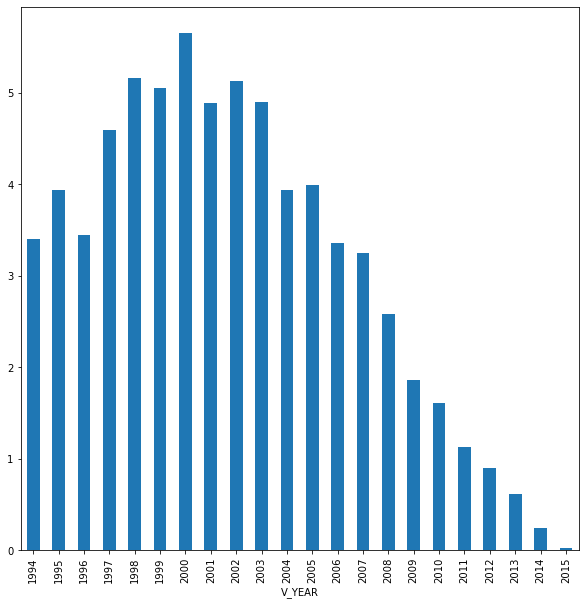

In [16]:
# gráfica de la evolución accidentes de los últimos 20 años (máxs)
datostabla = conting_table.iloc[-1].drop(['All','NNNN','UUUU']).iloc[92:114] 
datostabla.plot.bar(figsize=(10, 10))

In [17]:
datostablamax = conting_table.iloc[-1].drop(['All','NNNN','UUUU']).sort_values(ascending = False).head(10)
datostablamax.head(5)

V_YEAR
2000    5.655301
1998    5.160177
2002    5.129714
1999    5.047852
2003    4.900020
Name: All, dtype: float64

Tal y como hemos comentado antes el año con más accidentes, no sólo de los últimos 10 años sino desde el 1900 será el 2000 (valor del 5.65% sobre el total). En un artículo del país, coinciden con que España en el 2000 incrementó su tasa de siniestros en carretera en un 0.07% sin causa aparente.

<AxesSubplot:xlabel='V_YEAR'>

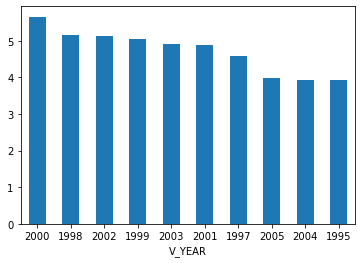

In [18]:
datostablamax.plot.bar(rot=0)

Aquí podemos observar qué años de fabricación de los vehículos han provocado mas accidentes. El año de fabricación que más ha causado accidentes fue el 2000, seguido por el 1998, 2002, 1999, 2003, etc. 

In [19]:
datostablamin = conting_table.iloc[-1].drop(['All','NNNN','UUUU']).sort_values(ascending = True).head(5)
datostablamin

V_YEAR
1905    0.000025
1906    0.000025
1910    0.000025
1904    0.000051
1907    0.000051
Name: All, dtype: float64

Podemos concluir que los vehículos menos propensos a tener un accidente son aquellos de principios del siglo XX. Podríamos considerar causa de este fenómeno el hecho de que el automóvil se inventara en 1900. Sin embargo no será hasta 1904 que Ford llega a Canadá con su producción. 

<AxesSubplot:xlabel='V_YEAR'>

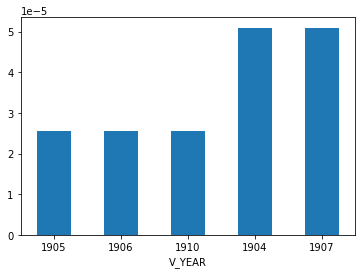

In [20]:
datostablamin.plot.bar(rot=0)

Estos cuatro años de fabricación de vehículo cuentan con el menor número de accidentes.

In [21]:
#tabla de contingenia relativa total (tipo vehículo)
conting_table2 = pd.crosstab(index=pd_accidentes['V_YEAR'], columns=pd_accidentes['V_TYPE'],
            margins=True).apply(lambda r: r/len(pd_accidentes) *100,
                                axis=1)

In [22]:
conting_table2.describe()

V_TYPE,01,05,06,07,08,09,10,11,14,16,...,18,19,20,21,22,23,NN,QQ,UU,All
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.444084,0.019957,0.053242,0.032146,0.027820,0.003067,0.000158,0.010825,0.041012,0.002218,...,0.000757,0.000627,0.002885,0.000175,0.001346,0.000808,0.002760,0.007771,0.011234,1.709402
std,7.861737,0.109008,0.289811,0.175096,0.152467,0.016739,0.000869,0.058928,0.223533,0.012685,...,0.004138,0.003646,0.015775,0.000952,0.007629,0.004656,0.015645,0.042732,0.074154,9.304963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000025
25%,0.000178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000255
50%,0.001095,0.000000,0.000127,0.000051,0.000025,0.000000,0.000000,0.000000,0.000127,0.000000,...,0.000000,0.000025,0.000127,0.000000,0.000000,0.000025,0.000000,0.000025,0.000025,0.001681
75%,0.665115,0.006266,0.023611,0.016199,0.010035,0.000815,0.000025,0.006622,0.024401,0.000917,...,0.000637,0.000331,0.001834,0.000076,0.000331,0.000076,0.000611,0.001987,0.001859,0.898732
max,84.478919,1.167473,3.114680,1.880550,1.627448,0.179415,0.009246,0.633252,2.399183,0.129773,...,0.044293,0.036678,0.168794,0.010214,0.078755,0.047248,0.161484,0.454600,0.657168,100.000000


<AxesSubplot:xlabel='V_TYPE'>

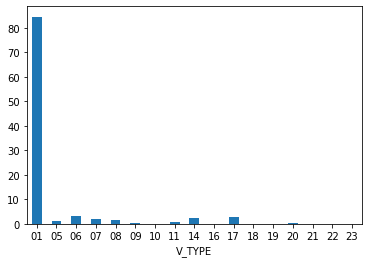

In [23]:
# cantidad de accidentes por tipo de vehículo
datostabla2 = conting_table2.iloc[-1].drop(['All','NN','UU','QQ'])
datostabla2.plot.bar(rot=0)

In [24]:
datostablamin = conting_table2.iloc[-1].drop(['All','NN','UU','QQ']).sort_values(ascending = True).head(5)
datostablamin

V_TYPE
10    0.009246
21    0.010214
19    0.036678
18    0.044293
23    0.047248
Name: All, dtype: float64

Podemos concluir que el vehículo con menor probabilidad de accidente será el autobús escolar de menos de 25 pasajeros (0,0092%), y el vehículo con más probabilidad de accidente será los turismos (84,5%).

In [25]:
datostablamax = conting_table2.iloc[-1].drop(['All','NN','UU','QQ']).sort_values(ascending = False).head(5)
datostablamax

V_TYPE
01    84.478919
06     3.114680
17     2.720827
14     2.399183
07     1.880550
Name: All, dtype: float64

#### Breve estudio otras variables 

In [26]:
pd_P_ID = pd_accidentes['P_ID']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_conteo = pd_accidentes['P_ID'].value_counts().reset_index()
pd_pc = pd.merge(pd_P_ID, pd_conteo, on=['index'], how='inner')
pd_pc.head(5)

,index,percent,P_ID
0,01,99.322328,3899480
1,02,0.502485,19728
2,03,0.109829,4312
3,04,0.038919,1528
4,05,0.014518,570


In [27]:
pd_P_SEX = pd_accidentes['P_SEX']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_conteo = pd_accidentes['P_SEX'].value_counts().reset_index()
pd_pc = pd.merge(pd_P_SEX, pd_conteo, on=['index'], how='inner')
pd_pc.head(5)

,index,percent,P_SEX
0,M,59.985492,2355082
1,F,35.999466,1413370
2,U,3.972888,155979
3,N,0.042154,1655


Con estos porcentajes podemos observar que en los accidentes, el 59.985% de los conductores son hombres y el 35.999% son mujeres, llegando a la conlusion de que los hombres tienen mayor probabilidad de estar involucrado en un accidente de coche que una mujer. 

In [28]:
pd_P_AGE = pd_accidentes['P_AGE']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_conteo = pd_accidentes['P_AGE'].value_counts().reset_index()
pd_pc = pd.merge(pd_P_AGE, pd_conteo, on=['index'], how='inner')
pd_pc.head(5)

,index,percent,P_AGE
0,UU,5.239238,205697
1,19,2.707073,106282
2,18,2.677654,105127
3,20,2.626636,103124
4,21,2.526256,99183


Analizando estos porcentajes, podemos observar cómo los jóvenes entre 19 y 21 años son los que tienen más pruebas de tener accidentes, que se suele deber a ser los más inexpertos en la carretera y a tener cierta falta de responsabilidad frente a personas mayores y con más experiencia.

In [29]:
pd_P_ISEV = pd_accidentes['P_ISEV']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_conteo = pd_accidentes['P_ISEV'].value_counts().reset_index()
pd_pc = pd.merge(pd_P_ISEV, pd_conteo, on=['index'], how='inner')
pd_pc.head(5)

,index,percent,P_ISEV
0,2,50.005272,1963250
1,1,42.133183,1654185
2,N,6.432335,252539
3,U,0.806885,31679
4,3,0.622325,24433


Con estos porcentajes podemos ver cómo en más de la mitad de los casos, en los accidentes el conductor sufre algún tipo de lesión, en el 42% de los casos no sufre ningún tipo de lesión, y en menos del 1% de los casos el conductor murió inmediatamente o dentro del límite de tiempo.

In [30]:
pd_P_SAFE = pd_accidentes['P_SAFE']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_conteo = pd_accidentes['P_SAFE'].value_counts().reset_index()
pd_pc = pd.merge(pd_P_SAFE, pd_conteo, on=['index'], how='inner')
pd_pc.head(5)

,index,percent,P_SAFE
0,02,71.227197,2796441
1,UU,11.292264,443344
2,NN,11.078081,434935
3,01,2.520016,98938
4,09,1.781647,69949


Podemos ver como en el 71% de los casos hubo uso de algún tipo de dispositivo de seguridad utilizado o sistema de retención infantil utilizado, en el 2.5% de los casos no se utilizó ningún dispositivo de seguridad, y en el 1,78% de los casos se utilizó un caso protector. 

In [31]:
pd_P_USER = pd_accidentes['P_USER']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_conteo = pd_accidentes['P_USER'].value_counts().reset_index()
pd_pc = pd.merge(pd_P_USER, pd_conteo, on=['index'], how='inner')
pd_pc.head(5)

,index,percent,P_USER
0,1,93.192737,3658827
1,4,2.720827,106822
2,5,2.399183,94194
3,U,1.667462,65466
4,3,0.019791,777


Podemos observar como en el 93% de los casos, el implicado se trataba del conductor de vehículos de motor, en el 2,7% se trataba de un ciclista, en el 2,4% se trataba de un motociclista y en el 0,01% de un peatón

# Pregunta 3: ¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?



### Preprocesamiento variables

Como hemos observado en el dataset, hay muchas filas repetidas, sin embargo estos no son una representación fiel de la realidad en cuánto al número de accidentes ocurridos pues tiene en cuenta *todos* los individuos y vehículos que se han visto afectados. Tenemos dos alternativas, la primera sería considerar que habrá tantos accidentes como conductores. Sin embargo, esta tendrá en consideración todos los conductores involucrados en un solo accidente. En nuestro caso 3.926.086, gracias al siguiente código reducimos nuestro dataset a un total de 1.850.395 filas, que representarán el número de accidentes ocurridos desde 1999 hasta 2014 

In [32]:
columnas_accidentes = ['C_YEAR', 'C_MNTH', 'C_WDAY', 
               'C_HOUR', 'C_SEV', 'C_VEHS', 
               'C_CONF', 'C_RCFG', 'C_WTHR', 
               'C_RSUR', 'C_RALN', 'C_TRAF']
datos_accidentes = pd_datos.groupby(columnas_accidentes).count()['V_ID']
datos_accidentes.columns = ['total_rows']
datos_accidentes = datos_accidentes.reset_index()
datos_accidentes

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID
0,1999,1,1,00,2,01,01,01,1,4,1,18,1
1,1999,1,1,00,2,01,01,01,1,5,1,18,1
2,1999,1,1,00,2,01,01,01,2,1,1,18,1
3,1999,1,1,00,2,01,01,01,6,3,2,18,2
4,1999,1,1,00,2,01,01,UU,1,2,3,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856903,2014,12,7,UU,2,02,UU,02,U,U,1,03,2
1856904,2014,UU,U,14,2,01,02,01,1,5,4,18,1
1856905,2014,UU,U,22,1,01,06,01,2,4,Q,18,2
1856906,2014,UU,U,23,2,01,06,05,1,1,U,18,1


Tomaremos como variables objetivo C_SEV (severidad del accidente) y P_ISEV (grado de severidad)

In [33]:
# P_ISEV = 3
pd_P_ISEV = pd_datos['P_ISEV']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_conteo = pd_datos['P_ISEV'].value_counts().reset_index()
pd_pc = pd.merge(pd_P_ISEV, pd_conteo, on=['index'], how='inner')
pd_pc.head(5)

,index,percent,P_ISEV
0,2,52.444003,3073431
1,1,40.529759,2375208
2,N,4.960596,290711
3,U,1.377055,80701
4,3,0.688587,40354


In [34]:
# Función para sacar % y valor absoluto de la variable objetivo C_SEV al ser un INT64
def classes_overview(df = None, obj_val = ""):
    temp = df[obj_val].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    temp_conteo = df[obj_val].value_counts().reset_index()
    return pd.merge(temp, temp_conteo, on=['index'], how='inner')

In [35]:
# C_SEV = 1, casos con al menos un fallecimiento
classes_overview(df = pd_datos, obj_val = 'C_SEV')

,index,percent,C_SEV
0,2,98.316959,5761772
1,1,1.683041,98633


In [36]:
# agrupamos las gráficas para que sea más sencilla y visual la interpretación
def norm_category(df = None, obj_val = "", cat_val = ""):    
    agrupados = df.groupby([obj_val, cat_val]).count().iloc[:,1]
    agrupados = agrupados.reset_index()
    agrupados.columns = [obj_val, cat_val, 'counted']
    
    agrupados['group%'] = np.round(agrupados['counted'] / 
                                 agrupados.groupby(obj_val)['counted'].transform('sum') * 100, decimals = 3)
    return agrupados


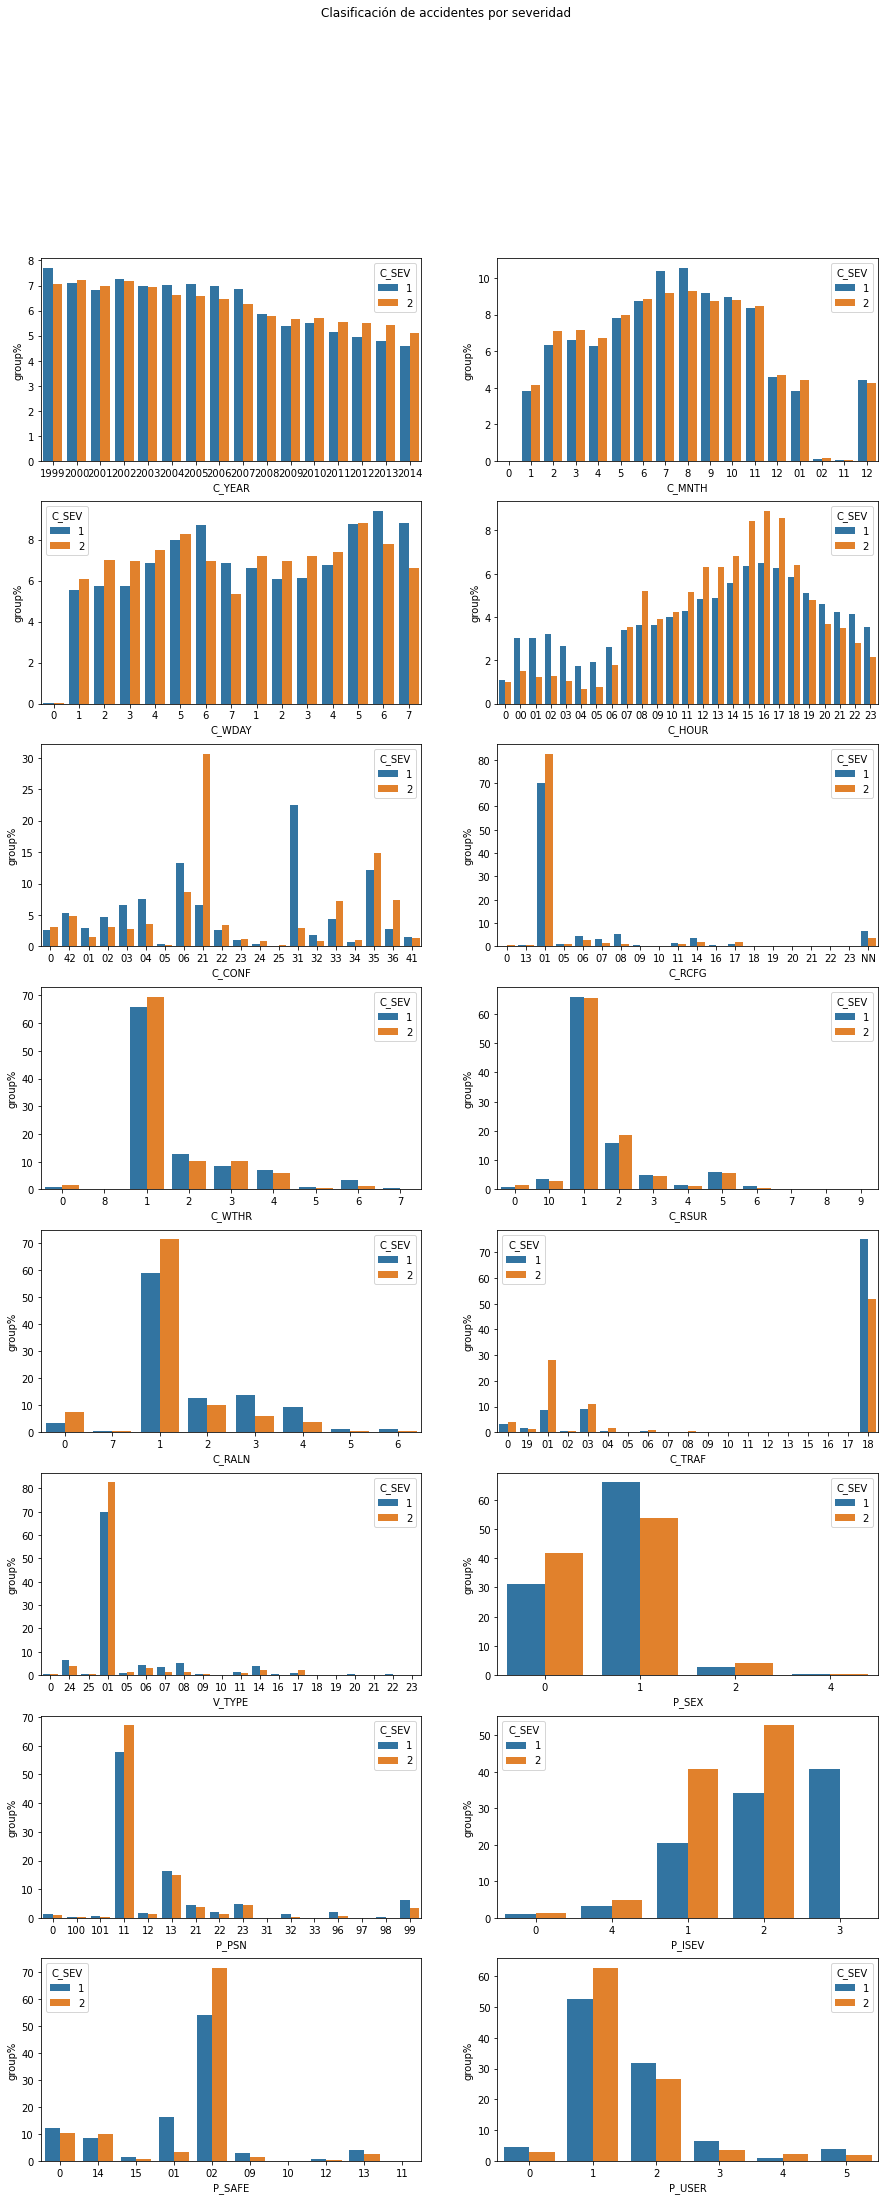

In [39]:
from matplotlib import pyplot as plt
categorias = ['C_YEAR','C_MNTH', 'C_WDAY', 'C_HOUR', 'C_CONF','C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 
               'C_TRAF', 'V_TYPE', 'P_SEX', 'P_PSN','P_ISEV', 'P_SAFE', 'P_USER']

fig, axes = plt.subplots(8, 2, figsize=(15, 35), sharey=False)
fig.suptitle('Clasificación de accidentes por severidad')
# 1 Por lo menos un fallecimiento
# 2 Ningún fallecimiento

i = 0
j = 0 

for cat in categorias:
    comp_var_objetivo = norm_category(df = pd_datos, obj_val = 'C_SEV', cat_val = cat)
    sns.barplot(data = comp_var_objetivo, x = cat, y = 'group%', hue = 'C_SEV', ax = axes[i,j]);
    if (j == 0): 
        j = 1
    else:
        j = 0
        i += 1

#### Conclusión

Clasificación más accidentes más fallecidos
- **C_YEAR** (últimos 15 años)
    -  1999 
    
- **C_MNTH** 
    -  Agosto 
        
- **C_WDAY**: 
    - Sábado
    
- **C_HOUR**:
    - 16:00 / 16:59
    
- **C_CONF**: 
    - Head on collision
    
- **C_RCFG**:
    - Non intersection
    
- **C_WTHR**: 
    - Clear and sunny 
    
- **C_RSUR**:
    - Dry, normal
    
- **C_RALN**:
    - Straight and level
    
- **C_TRAF**:
    - No control present

- **V_TYPE**:
    - Light Duty Vehicle

- **P_SEX**:
    - Male
    
- **P_PSN**:
    - Driver
    
- **P_SAFE**:
    - Safety device used or child restraint used
    
- **P_USER**:
    - Motor Vehicle Driver

Para llevar a cabo la creación de un modelo de predicción vamos a cambiar todas nuestras variables categóricas a numéricas

In [38]:
p1 = {'UU':0, 'XX':13}
pd_datos['C_MNTH'] = pd_datos['C_MNTH'].replace(p1)
p2 = {'U':0, 'X':8}
pd_datos['C_WDAY'] = pd_datos['C_WDAY'].replace(p2)

p3 = {'UU':0, 'XX':24}
pd_datos['C_HOUR'] = pd_datos['C_HOUR'].replace(p3)
p4 = {'U':0, 'X':3}
pd_datos['C_SEV'] = pd_datos['C_SEV'].replace(p4)

p5 = {'UU':0, 'XX':100}
pd_datos['C_VEHS'] = pd_datos['C_VEHS'].replace(p5)
p6 = {'QQ': 42, 'UU':0, 'XX':43}
pd_datos['C_CONF'] = pd_datos['C_CONF'].replace(p6)

p7 = {'QQ': 13, 'UU':0, 'XX':14}
pd_datos['C_RCFG'] = pd_datos['V_TYPE'].replace(p7)
p8 = {'Q': 8, 'U':0, 'X':9}
pd_datos['C_WTHR'] = pd_datos['C_WTHR'].replace(p8)

p9 = {'Q': 10, 'U':0, 'X':11}
pd_datos['C_RSUR'] = pd_datos['C_RSUR'].replace(p9)
p10 = {'Q': 7, 'U':0, 'X':8}
pd_datos['C_RALN'] = pd_datos['C_RALN'].replace(p10)

p11 = {'QQ': 19, 'UU':0, 'XX':20}
pd_datos['C_TRAF'] = pd_datos['C_TRAF'].replace(p11)
p12 = {'UU':0}
pd_datos['V_ID'] = pd_datos['V_ID'].replace(p12)

p13 = {'NN':24,'QQ': 25, 'UU':0, 'XX':26}
pd_datos['V_TYPE'] = pd_datos['V_TYPE'].replace(p13)
p14 = {'NNNN':2222, 'UUUU':0, 'XXXX':2224}
pd_datos['V_YEAR'] = pd_datos['V_YEAR'].replace(p14)

p15 = {'NN':100, 'UU':0}
pd_datos['P_ID'] = pd_datos['P_ID'].replace(p15)
p16 = {'F':0,'M': 1, 'U':2, 'X':3, 'N':4}
pd_datos['P_SEX'] = pd_datos['P_SEX'].replace(p16)

p17 = {'NN':0,'UU':0, 'XX':0}
pd_datos['P_AGE'] = pd_datos['P_AGE'].replace(p17)
p18 = {'NN':100,'QQ': 101, 'UU':0, 'XX':102}
pd_datos['P_PSN'] = pd_datos['P_PSN'].replace(p18)

p19 = {'N':4, 'U':0, 'X':5}
pd_datos['P_ISEV'] = pd_datos['P_ISEV'].replace(p19)
p20 = {'NN':14,'QQ': 15, 'UU':0, 'XX':16}
pd_datos['P_SAFE'] = pd_datos['P_SAFE'].replace(p20)

p21 = {'U':0}
pd_datos['P_USER'] = pd_datos['P_USER'].replace(p21)

# Pregunta 4: Dado un accidente, ¿se puede generar un modelo que prediga si habrá fallecimientos o no? ¿Si se va a necesitar tratamiento médico o no? Las aseguradoras tienen que inmovilizar capital para pagar estas casuísticas. 

### Estudio Variables Objetivo

Encoding

Variables ordinales: sus valores pueden ser ordenados jerárquicamente, como, por ejemplo, el nivel de educación de una persona (sin estudios, primaria, secundaria o superiores).

Variables nominales: no se puede establecer un orden en sus categorías. Algunos ejemplos son el sexo de una persona (hombre o mujer), el color del pelo (castaño, rubio, negro o rojo) o el país de nacimiento (España, Italia, Francia, etc.).

#### Train y Test

In [31]:
 from sklearn.model_selection import train_test_split

In [32]:
X = pd_datos.drop('C_SEV', axis=1)
Y = pd_datos['C_SEV']
# realizamos la división en train (muestra entrenamiento) y test (muestra de test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y)

En el preprocesamiento de las variables objetivo del ejercicio anterior apreciamos un fuerte desequilibrio en C_SEV , habiendo un 98% de accidentes no mortales frente a un 2% de accidentes mortales. Es por esto que vamos a llevar a cabo un balanceo de las variables.

## Pregunta 5: Libertad para generar análisis de valor y nuevas ideas. Se debe atacar mínimo un modelo (estimar si habrá fallecidos o no). Hecho esto, se puede plantear de forma opcional otros alcances (libertad para plantear opciones). 

## Pregunta extra: Plus: complementar con datos abiertos de clima (aunque Canadá es muy grande) y de otra tipología, ¿hay algún tipo de relación con temperaturas medias, precipitación media del día/mes, nieve...? ¿a más días festivos o de vacaciones, más accidentes? etc. 